In [59]:
from wordcloud.wordcloud import matplotlib
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns
import cufflinks as cf
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
cf.go_offline() 
from wordcloud import WordCloud  
#for text processing
import string
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#for feature selection
from sklearn import decomposition

#for model building
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
import numpy as np # linear algebra
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import warnings
warnings.filterwarnings('ignore')


from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
from wordcloud import WordCloud , ImageColorGenerator

from nltk.corpus import stopwords
from textblob import TextBlob

In [4]:
from google.colab import files
uploaded = files.upload() 

Saving donaldtweets.csv to donaldtweets.csv


In [5]:
import warnings
warnings.filterwarnings('ignore')


from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
from wordcloud import WordCloud , ImageColorGenerator

from nltk.corpus import stopwords
from textblob import TextBlob

In [6]:
df = pd.read_csv('donaldtweets.csv')
df.head()

,Unnamed: 0,date,target,insult,tweet
0,1,2014-10-09,thomas-frieden,fool,"Can you believe this fool, Dr. Thomas Frieden ..."
1,2,2014-10-09,thomas-frieden,DOPE,"Can you believe this fool, Dr. Thomas Frieden ..."
2,3,2015-06-16,politicians,all talk and no action,Big time in U.S. today - MAKE AMERICA GREAT AG...
3,4,2015-06-24,ben-cardin,It's politicians like Cardin that have destroy...,Politician @SenatorCardin didn't like that I s...
4,5,2015-06-24,neil-young,total hypocrite,"For the nonbeliever, here is a photo of @Neily..."


In [7]:
df.shape

(10360, 5)

In [ ]:
df.isnull().sum()

Unnamed: 0    0
date          0
target        2
insult        0
tweet         0
dtype: int64

In [8]:
df=df.dropna(axis=0)

In [9]:
from datetime import datetime

df['date'] = pd.to_datetime(df['date'], infer_datetime_format = True)
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['week']=df['date'].dt.week
df.head()

,Unnamed: 0,date,target,insult,tweet,year,month,week
0,1,2014-10-09,thomas-frieden,fool,"Can you believe this fool, Dr. Thomas Frieden ...",2014,10,41
1,2,2014-10-09,thomas-frieden,DOPE,"Can you believe this fool, Dr. Thomas Frieden ...",2014,10,41
2,3,2015-06-16,politicians,all talk and no action,Big time in U.S. today - MAKE AMERICA GREAT AG...,2015,6,25
3,4,2015-06-24,ben-cardin,It's politicians like Cardin that have destroy...,Politician @SenatorCardin didn't like that I s...,2015,6,26
4,5,2015-06-24,neil-young,total hypocrite,"For the nonbeliever, here is a photo of @Neily...",2015,6,26


In [10]:
df_year = pd.DataFrame(df.groupby('year')['insult'].count().reset_index())
df_year.columns=['year','count']
df_year = df_year.sort_values(['count'],ascending=True)

fig = px.bar(df_year,y='year',x='count',
             orientation='h',color='count')
fig.update_layout(title_text='number of insults in each year',title_x=0.5,
                  template='plotly_dark')
fig.show()

In [ ]:
df_2020=df[df.year==2020]
most_Insulted = df_2020.groupby(['target'])['insult'].count().reset_index(name='count').sort_values(by='count',ascending=False)


fig = px.bar(most_Insulted.head(10),y='count',x='target',color='count')
fig.update_layout(title_text='most instulted in year 2020',title_x=0.5,template='plotly_dark')
fig.show()

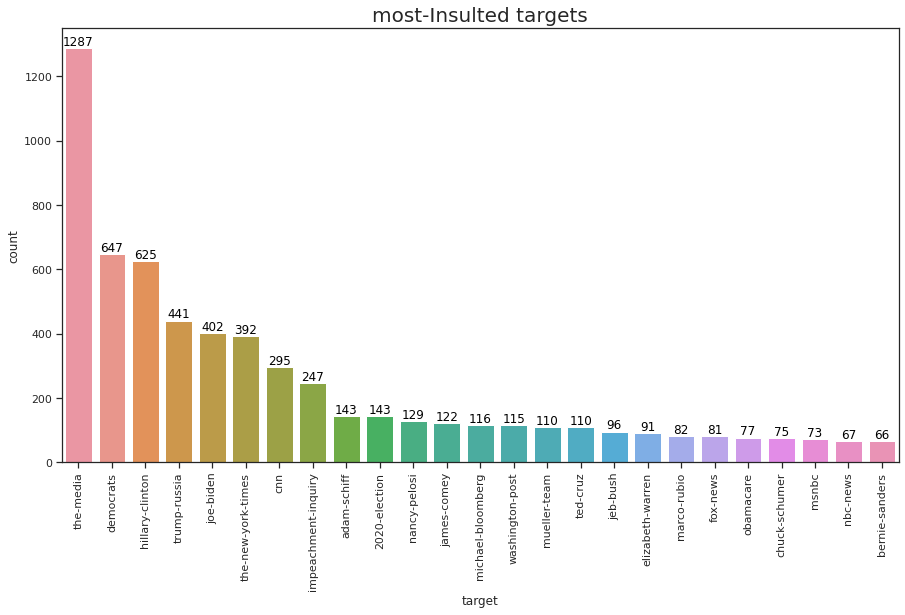

In [ ]:
most_Insulted = df.groupby(['target'])['Unnamed: 0'].count().reset_index(name='count').sort_values(by='count',ascending=False)

fig_dims = (15, 8)
fig, ax1 = plt.subplots(figsize=fig_dims)
figure1= sns.barplot(x='target',y='count' , ax=ax1 , data=most_Insulted.head(25))
for item in figure1.get_xticklabels():
    item.set_rotation(90)

ax = plt.gca()

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.title('most-Insulted targets',size='20') 

plt.show()

In [18]:
df_target = pd.DataFrame(df.groupby('target')['insult'].count().reset_index())
df_target.columns=['target','count']
df_target = df_target.sort_values(['count'],ascending=False)
df_target

,target,count
770,the-media,1287
223,democrats,647
331,hillary-clinton,625
802,trump-russia,441
394,joe-biden,402
...,...,...
641,puerto-rico-aid-relief,1
288,frank-bruni,1
290,frank-vandersloot,1
293,french-wine,1


In [19]:
target = df_target['target'].iloc[0:10,].tolist()
count=df_target['count'].iloc[0:10,].tolist()

fig = go.Figure(data=[go.Table(header=dict(values=['target','Number of insults'],
                                          fill_color='blue',
                                           height=30),
                 cells=dict(values=[target,count],
                            height=30))
                     ])
fig.update_layout(title_text='Top 10 targets with most number of insults',title_x=0.5,
                  template='plotly_dark')
fig.show()

In [20]:
unique_targetcounts = df.target.value_counts()
unique_targetcounts

the-media                  1287
democrats                   647
hillary-clinton             625
trump-russia                441
joe-biden                   402
                           ... 
mccabe-memos                  1
state-department              1
us-mexico-trade-surplus       1
us-court-system               1
mike-pence                    1
Name: target, Length: 866, dtype: int64

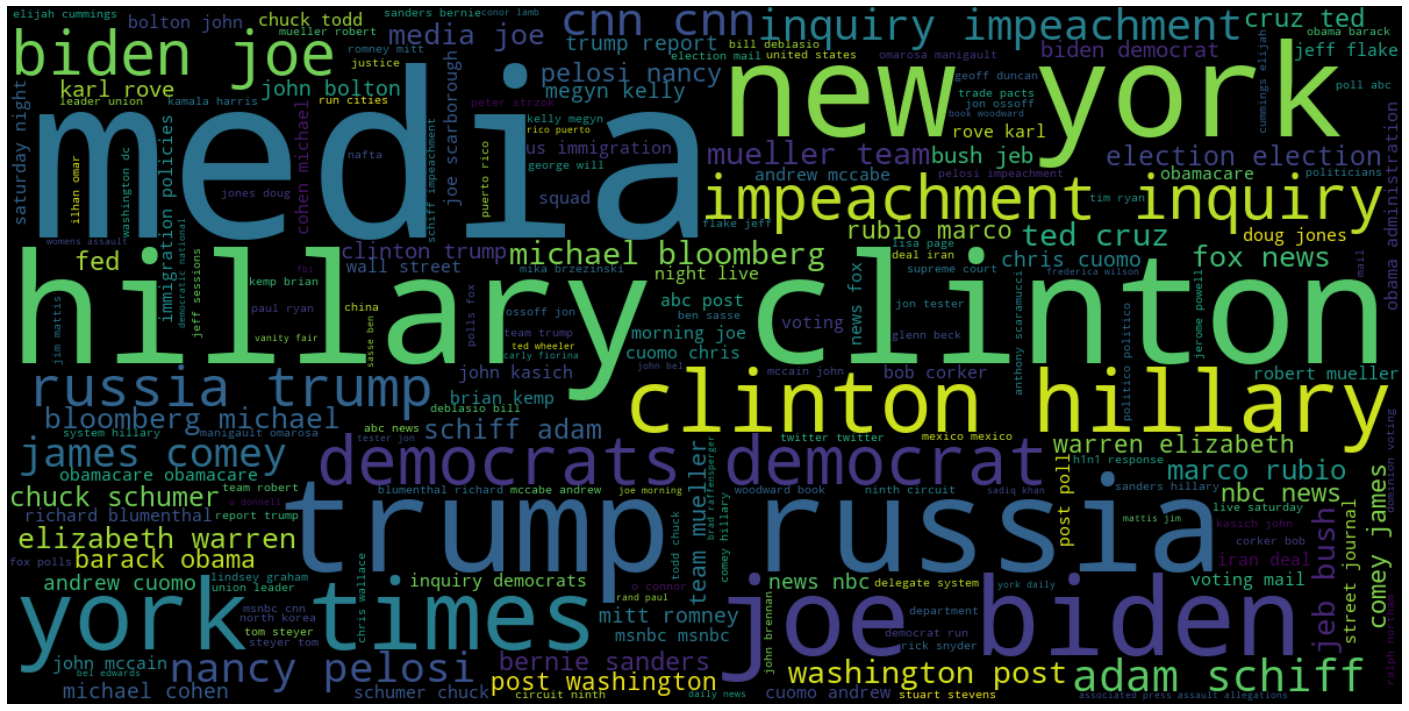

In [21]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

target_text = " ".join(df.target)
wordcloud = WordCloud(width=1200, height=600).generate(text=target_text)
plt.figure(figsize=(25,18))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

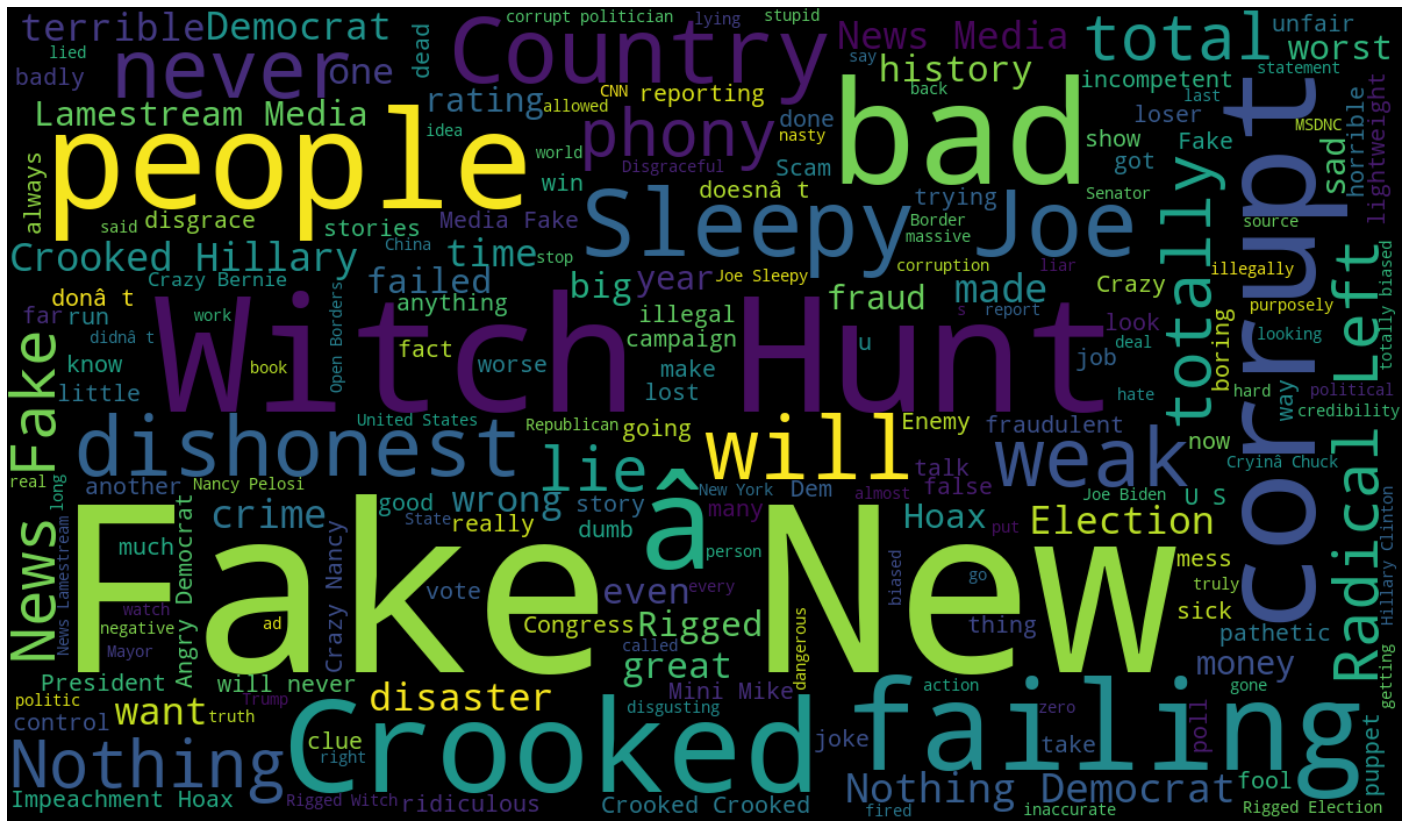

In [22]:
insult_text = " ".join(df.insult)
wordcloud = WordCloud(width=1200, height=700).generate(text=insult_text)
plt.figure(figsize=(25,18))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [24]:
df.columns = df.columns.str.lower()
df.columns 

Index(['unnamed: 0', 'date', 'target', 'insult', 'tweet', 'year', 'month',
       'week'],
      dtype='object')

In [25]:
df1=df[['date', 'target', 'insult', 'tweet', 'year']]

In [26]:
df['tweet'] = df['tweet'].astype('str')
df['insult'] = df['insult'].astype('str')

In [27]:
def clean_data(text):
    text = text.lower()  # convert all the text into lowercase
    text = text.strip()  #remove starting and trailing whitespaces
    special_char_reg = '([a-zA-Z0-9]+)' + '[!"#$%&\'()*+,-./:;<=>?@\\^_`{|}~]' + '([a-zA-Z0-9]+)'
    text = re.sub(special_char_reg, ' ', text)
    text = re.sub(r'\s+', ' ', text) #remove all line formattings
    text = re.sub(r'\d+', '', text) #remove digits
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(r"\w+…|…", "", text)  # Remove ellipsis (and last word)
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = ''.join(c for c in text if c not in string.punctuation)   #remove pecial symbols from job titles
    return text

In [28]:
tweet_df = df.tweet.apply(lambda x : clean_data(x))
tweet_df.head()

0    can you believe this fool dr thomas frieden of...
1    can you believe this fool dr thomas frieden of...
2    big time in  today  make america great again p...
3    politician senatorcardin like that i said balt...
4    for the nonbeliever here is a photo of neilyou...
Name: tweet, dtype: object

In [29]:
insult_df = df.insult.apply(lambda x : clean_data(x))
insult_df.head()

0                                                 fool
1                                                 dope
2                               all talk and no action
3     politicians like cardin that have destroyed b...
4                                      total hypocrite
Name: insult, dtype: object

In [38]:
from nltk import WordNetLemmatizer
def lemma(text):
    word_list = nltk.word_tokenize(text) #tokenize beofre lemmatization
    lemma_output = ' '.join(WordNetLemmatizer().lemmatize(word) for word in word_list)
    return lemma_output
tweet_df_lemma = tweet_df.apply(lambda x : lemma(x))
insult_df_lemma = insult_df.apply(lambda x : lemma(x))

In [39]:
from nltk import word_tokenize
def remove_stopwords_and_tokenize(text):
    the_stopwords = set(stopwords.words("english"))
    tokens = word_tokenize(text)  # tokenize 
    tokens = [t for t in tokens if not t in the_stopwords]  
    tokens = [t for t in tokens if len(t) > 1] 
    return tokens

In [40]:
tweet_df_token = tweet_df_lemma.apply(lambda x : remove_stopwords_and_tokenize(x))
tweet_df_token.head()

0    [believe, fool, dr, thomas, frieden, cdc, stat...
1    [believe, fool, dr, thomas, frieden, cdc, stat...
2    [big, time, today, make, america, great, polit...
3    [politician, senatorcardin, like, said, baltim...
4    [nonbeliever, photo, neilyoung, office, reques...
Name: tweet, dtype: object

In [41]:
insult_df_token = insult_df_lemma.apply(lambda x : remove_stopwords_and_tokenize(x))
insult_df_token.head()

0                                              [fool]
1                                              [dope]
2                                      [talk, action]
3    [politician, like, cardin, destroyed, baltimore]
4                                  [total, hypocrite]
Name: insult, dtype: object

In [42]:
count_vect = CountVectorizer(ngram_range=(1,1))
token = count_vect.fit_transform(tweet_df_lemma)
token

<10358x9894 sparse matrix of type '<class 'numpy.int64'>'
	with 302346 stored elements in Compressed Sparse Row format>

In [43]:
print('Total number of tokens/words in all the tweets - ', len(count_vect.get_feature_names()))

Total number of tokens/words in all the tweets -  9894


In [44]:
count_vect = CountVectorizer(ngram_range=(1,1))
token = count_vect.fit_transform(insult_df_lemma)
token

<10358x4027 sparse matrix of type '<class 'numpy.int64'>'
	with 44482 stored elements in Compressed Sparse Row format>

In [45]:
temp_df =  pd.DataFrame(token.toarray(), columns=count_vect.get_feature_names())
temp_df.tail()

,abandoned,abc,abe,ability,able,abortion,about,absentee,absolute,absolutely,...,œthinksâ,œthisâ,œthrough,œtime,œtrump,œunhingedâ,œupstairsâ,œwhat,œwillâ,œwires
10353,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10354,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10355,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10356,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10357,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
#count the accurence of each token in entire corpus
count_df_insult = temp_df.apply(lambda x : x.sum())

In [47]:
count_df_insult = pd.DataFrame(count_df_insult).reset_index()
count_df_insult.columns = ['Word', 'Count']
most_insults= count_df_insult.sort_values(by= 'Count', ascending=False)
most_insults.head(10)

,Word,Count
3472,the,1742
1206,fake,1011
118,and,942
3527,to,917
2314,news,840
2382,of,834
1680,in,603
1326,for,438
1788,is,411
756,crooked,409


In [48]:
fig = px.bar(count_df_insult.head(30),y='Word',x='Count',
             orientation='h',color='Count')
fig.update_layout(title_text='most used words in insults',title_x=0.5,
                  template='plotly_dark')
fig.show()

In [82]:
count_vect = CountVectorizer(ngram_range=(1,1))
token = count_vect.fit_transform(tweet_df_lemma)
token

<10358x9894 sparse matrix of type '<class 'numpy.int64'>'
	with 302346 stored elements in Compressed Sparse Row format>

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(ngram_range=(1,1), min_df=0.05, max_df=0.95)
tfidf_vect

TfidfVectorizer(max_df=0.95, min_df=0.05)

In [84]:
token_tweet = tfidf_vect.fit_transform(tweet_df_lemma)

In [85]:
df_rf= pd.DataFrame(token_tweet.toarray(), columns=tfidf_vect.get_feature_names())

In [86]:
df_rf.shape

(10358, 106)

In [87]:
from sklearn.model_selection import train_test_split

train_x, test_x,train_y, test_y = train_test_split(df_rf,y, test_size = 0.2, random_state = 5)
print(train_x.shape, test_x.shape)

(8286, 106) (2072, 106)


In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [90]:
param_grid = {'n_estimators':[130,150,160,180,200],
              'max_features':[13,15,17,19]}

grid_rf = GridSearchCV(estimator= RandomForestClassifier(),
                      param_grid=param_grid,
                      cv = 10,
                      n_jobs=-1, verbose=True)

grid_rf.fit(train_x,train_y)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': [13, 15, 17, 19],
                         'n_estimators': [130, 150, 160, 180, 200]},
             verbose=True)

In [92]:
grid_rf.best_score_

1.0

In [93]:
grid_rf.best_params_

{'max_features': 13, 'n_estimators': 130}

In [94]:
grid_rf.best_estimator_

RandomForestClassifier(max_features=13, n_estimators=130)

In [95]:
rf_model = grid_rf.best_estimator_
rf_model.fit(train_x, train_y)

RandomForestClassifier(max_features=13, n_estimators=130)

In [96]:
rf_train_predict = pd.DataFrame({'actual' : train_y,
                                 'predicted' : rf_model.predict(train_x)})
rf_train_predict.head()

,actual,predicted
8233,1,1
5263,1,1
1756,1,1
2649,1,1
7023,1,1


In [98]:
rf_test_predict = pd.DataFrame({'actual' : test_y,
                                 'predicted' : rf_model.predict(test_x)})
rf_test_predict.head()

,actual,predicted
1988,1,1
442,1,1
5690,1,1
9844,1,1
9271,1,1


In [99]:
print('Accuracy Score for train dataset : ' , metrics.accuracy_score(rf_train_predict.actual, rf_train_predict.predicted))
print('Accuracy Score for test dataset : ' , metrics.accuracy_score(rf_test_predict.actual, rf_test_predict.predicted))

Accuracy Score for train dataset :  1.0
Accuracy Score for test dataset :  1.0


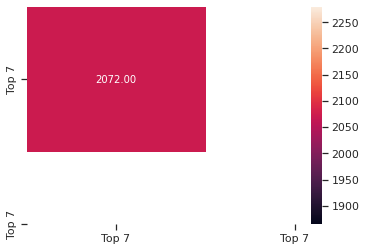

In [103]:
conn_cm_test = metrics.confusion_matrix(rf_test_predict.actual, rf_test_predict.predicted)
sns.heatmap(conn_cm_test, fmt= '.2f', annot=True,  xticklabels=['Top 7', 'Top 7'], yticklabels=['Top 7', 'Top 7'])

In [104]:
print(metrics.classification_report(rf_test_predict.actual, rf_test_predict.predicted))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2072

    accuracy                           1.00      2072
   macro avg       1.00      1.00      1.00      2072
weighted avg       1.00      1.00      1.00      2072



In [105]:
indices = np.argsort(rf_model.feature_importances_)[::-1]
feature_rank = pd.DataFrame(columns = ['rank', 'feature', 'importance'])
for f in range(train_x.shape[1]):
    feature_rank.loc[f] = [f+1,
                          train_x.columns[indices[f]],
                          rf_model.feature_importances_[indices[f]]]
feature_rank.round(3)

,rank,feature,importance
0,1,you,0.0
1,2,for,0.0
2,3,get,0.0
3,4,great,0.0
4,5,ha,0.0
...,...,...,...
101,102,she,0.0
102,103,should,0.0
103,104,so,0.0
104,105,state,0.0


In [106]:
feature_rank[:17]

,rank,feature,importance
0,1,you,0.0
1,2,for,0.0
2,3,get,0.0
3,4,great,0.0
4,5,ha,0.0
5,6,have,0.0
6,7,he,0.0
7,8,her,0.0
8,9,hillary,0.0
9,10,his,0.0
